In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [2]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [3]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [4]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [5]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [6]:
train.shape

(120, 4)

In [7]:
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [8]:
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [9]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[256, 128],
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ahoyt\\AppData\\Local\\Temp\\tmpges3bwtl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [10]:
accuracy = []
for i in range(50):   
    classifier.train(
        input_fn=lambda: input_fn(train, train_y, training=True),
        steps=100)

    eval_result = classifier.evaluate(
        input_fn=lambda: input_fn(test, test_y, training=False))
    accuracy.append(eval_result["loss"])

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.2886916, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 100...
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow

INFO:tensorflow:loss = 0.48762324, step = 400
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 500...
INFO:tensorflow:Saving checkpoints for 500 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 500...
INFO:tensorflow:Loss for final step: 0.44699913.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-03T12:14:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.20061s
INFO:tensorflow:Finished evaluation at 2021-11-03-12:14:42
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.8333333, average_loss = 0.52171683, global_s

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 900...
INFO:tensorflow:Saving checkpoints for 900 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 900...
INFO:tensorflow:loss = 0.333566, step = 900
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1000...
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1000...
INFO:tensorflow:Loss for final step: 0.32963866.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-03T12:14:57
INFO:tensorflow:Graph was final

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-1400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1400...
INFO:tensorflow:Saving checkpoints for 1400 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1400...
INFO:tensorflow:loss = 0.25590786, step = 1400
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1500...
INFO:tensorflow:Saving checkpoints for 1500 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1500...
INFO:tensorflow:Loss for final step: 0.25193268.
INFO:tensorflow:Calling model_fn.
INFO:

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1900: C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-1900
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-1900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1900...
INFO:tensorflow:Saving checkpoints for 1900 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1900...
INFO:tensorflow:loss = 0.21506155, step = 1900
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2000...
INFO:tensorflow:Saving checkpoints for 2000 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow:Calling checkpoi

INFO:tensorflow:Inference Time : 0.17842s
INFO:tensorflow:Finished evaluation at 2021-11-03-12:15:40
INFO:tensorflow:Saving dict for global step 2400: accuracy = 0.96666664, average_loss = 0.19612664, global_step = 2400, loss = 0.19612664
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2400: C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-2400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-2400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2400...
INFO:tensorflow:Saving checkpoints for 2400 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2400...
INFO:tensorflow:loss = 0.

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-2900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.16931s
INFO:tensorflow:Finished evaluation at 2021-11-03-12:15:55
INFO:tensorflow:Saving dict for global step 2900: accuracy = 0.96666664, average_loss = 0.16484077, global_step = 2900, loss = 0.16484077
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2900: C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-2900
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-2900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving chec

INFO:tensorflow:Loss for final step: 0.124265105.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-03T12:16:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-3400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.17846s
INFO:tensorflow:Finished evaluation at 2021-11-03-12:16:11
INFO:tensorflow:Saving dict for global step 3400: accuracy = 0.96666664, average_loss = 0.143405, global_step = 3400, loss = 0.143405
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3400: C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-3400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\T

INFO:tensorflow:Saving checkpoints for 3900 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3900...
INFO:tensorflow:Loss for final step: 0.12087261.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-03T12:16:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-3900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.20680s
INFO:tensorflow:Finished evaluation at 2021-11-03-12:16:27
INFO:tensorflow:Saving dict for global step 3900: accuracy = 0.96666664, average_loss = 0.12780331, global_step = 3900, loss = 0.12780331
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3900: C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-3900
INFO:tensorflow:Calling model_fn.
INFO:

INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4300...
INFO:tensorflow:loss = 0.109969206, step = 4300
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4400...
INFO:tensorflow:Saving checkpoints for 4400 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4400...
INFO:tensorflow:Loss for final step: 0.111298546.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-03T12:16:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-4400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.22654s
INFO:tensorflow:Finished evaluation at 2021-11-03-12:16:44
INFO:tensorflow:Saving dict for global step 4400: accuracy = 0.96666664, average_loss = 0.11617803, global

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4800...
INFO:tensorflow:Saving checkpoints for 4800 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4800...
INFO:tensorflow:loss = 0.10230738, step = 4800
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4900...
INFO:tensorflow:Saving checkpoints for 4900 into C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 4900...
INFO:tensorflow:Loss for final step: 0.08972925.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-03T12:16:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-4900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done run

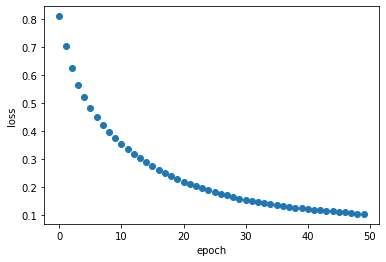

In [14]:
plt.scatter(range(50), accuracy)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
# print(eval_result["accuracy"])
# print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

In [12]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))


Please type numeric values as prompted.
SepalLength: 0.0
SepalWidth: 0.0
PetalLength: 0.0
PetalWidth: 0.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahoyt\AppData\Local\Temp\tmpges3bwtl\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (43.9%)
